In [1]:
import urllib.request

url = 'https://opendata-ajuntament.barcelona.cat/data/api/action/datastore_search?resource_id=857fe9dd-8d84-49be-9646-a304467e8c45'
fileobj = urllib.request.urlopen(url)
print(fileobj.read())

b'{"help": "https://opendata-ajuntament.barcelona.cat/data/api/3/action/help_show?name=datastore_search", "success": true, "result": {"resource_id": "857fe9dd-8d84-49be-9646-a304467e8c45", "fields": [{"type": "int4", "id": "_id"}, {"type": "text", "id": "TRAM"}, {"type": "text", "id": "Rang"}, {"type": "text", "id": "GEOM_WKT"}], "records": [{"TRAM": "T04719W", "Rang": "30 - 40 \\u00b5g/m\\u00b3", "_id": 1, "GEOM_WKT": "MULTILINESTRING ((430229.788593716 4586585.19905775,430181.876584091 4586593.70443592))"}, {"TRAM": "T19941Z", "Rang": "30 - 40 \\u00b5g/m\\u00b3", "_id": 2, "GEOM_WKT": "MULTILINESTRING ((432928.898296899 4584019.98762825,432994.983965867 4583963.09304168))"}, {"TRAM": "T18111R", "Rang": "30 - 40 \\u00b5g/m\\u00b3", "_id": 3, "GEOM_WKT": "MULTILINESTRING ((429953.263102905 4588161.44067207,429981.418243399 4588174.24947826,430025.298476374 4588196.06217914))"}, {"TRAM": "T03222Y", "Rang": "30 - 40 \\u00b5g/m\\u00b3", "_id": 4, "GEOM_WKT": "MULTILINESTRING ((427949.0382

In [2]:
for i in fileobj.readlines():
    print(i)

In [3]:
from libpysal import weights, examples
from contextily import add_basemap
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import geopandas

# read in example data from a geopackage file. Geopackages
# are a format for storing geographic data that is backed
# by sqlite. geopandas reads data relying on the fiona package,
# providing a high-level pandas-style interface to geographic data.
map_gpkg = geopandas.read_file("data/2017_tramer_mapa_estrategic_soroll_bcn.csv")
map_gpkg

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


,TRAM,TOTAL_D,TOTAL_E,TOTAL_N,TOTAL_DEN,TRANSIT_D,TRANSIT_E,TRANSIT_N,TRANSIT_DEN,GI_TR_D,...,INDUST_E,INDUST_N,INDUST_DEN,VIANANTS_D,VIANANTS_E,OCI_N,PATIS_D,PATIS_E,GEOM_WKT,geometry
0,T04719W,70 - 75 dB(A),65 - 70 dB(A),60 - 65 dB(A),70 - 75 dB(A),70 - 75 dB(A),65 - 70 dB(A),60 - 65 dB(A),70 - 75 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((430229.788593716 4586585.199...,None
1,T19941Z,45 - 50 dB(A),45 - 50 dB(A),< 40 dB(A),45 - 50 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),45 - 50 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),45 - 50 dB(A),45 - 50 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((432928.898296899 4584019.987...,None
2,T18111R,55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),40 - 45 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((429953.263102905 4588161.440...,None
3,T03222Y,60 - 65 dB(A),55 - 60 dB(A),60 - 65 dB(A),65 - 70 dB(A),60 - 65 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),50 - 55 dB(A),50 - 55 dB(A),60 - 65 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((427949.038250661 4580946.042...,None
4,T17625I,55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),60 - 65 dB(A),55 - 60 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((433950.188943519 4585741.213...,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17953,T08868Y,55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),55 - 60 dB(A),55 - 60 dB(A),50 - 55 dB(A),55 - 60 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((431756.999149255 4585026.456...,None
17954,P98700,50 - 55 dB(A),40 - 45 dB(A),< 40 dB(A),50 - 55 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),50 - 55 dB(A),< 40 dB(A),"MULTILINESTRING ((433540.3279 4587660.4522,433...",None
17955,P98690,40 - 45 dB(A),< 40 dB(A),< 40 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),"MULTILINESTRING ((433545.366 4587658.255,43354...",None
17956,P27312,50 - 55 dB(A),40 - 45 dB(A),< 40 dB(A),50 - 55 dB(A),40 - 45 dB(A),40 - 45 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),50 - 55 dB(A),< 40 dB(A),"MULTILINESTRING ((430555.994 4585460.656,43055...",None


In [4]:
import pandas as pd
trams = pd.read_csv('data/BCN_GrafVial_CSV/BCN_GrafVial_Trams_ETRS89_CSV.csv',sep=';', encoding='latin-1')
trams

,FID,COORD_X,COORD_Y,LONGITUD,ANGLE,C_Tram,C_Nus_I,C_Nus_F,Distric_D,NDistric_D,...,TVia_D,NVia_D,Tram_Dret,Distric_E,NDistric_E,Illa_E,CVia_E,TVia_E,NVia_E,Tram_Esq
0,0,432128.893,4581047.606,42.615,15.04,T00001B,N00001D,N00002E,1,Ciutat Vella,...,Carrer,Carrer Pepe Rubianes,2,1,Ciutat Vella,10410,10900,Carrer,Carrer Pepe Rubianes,1
1,1,432156.649,4581054.946,14.806,14.20,T00002C,N00002E,N00003F,1,Ciutat Vella,...,Carrer,Carrer Pepe Rubianes,4 <=> 6,1,Ciutat Vella,10421,10900,Carrer,Carrer Pepe Rubianes,3 <=> 5
2,2,432171.171,4581059.200,15.480,18.40,T00003D,N00003F,N00004G,1,Ciutat Vella,...,Carrer,Carrer Pepe Rubianes,4 <=> 6,1,Ciutat Vella,10421,10900,Carrer,Carrer Pepe Rubianes,3 <=> 5
3,3,432185.863,4581063.068,14.969,10.98,T00004E,N00004G,N00005H,1,Ciutat Vella,...,Carrer,Carrer Pepe Rubianes,8 <=> 8 Z,1,Ciutat Vella,10441,10900,Carrer,Carrer Pepe Rubianes,7 <=> 9
4,4,432200.396,4581066.659,15.010,16.80,T00005F,N00005H,N00006I,1,Ciutat Vella,...,Carrer,Carrer Pepe Rubianes,10,1,Ciutat Vella,10441,10900,Carrer,Carrer Pepe Rubianes,7 <=> 9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14826,14826,426840.231,4583372.122,37.131,306.71,T21653T,N07106N,N10755R,5,Sarrià-Sant Gervasi,...,Via,Via Augusta,313,5,Sarrià-Sant Gervasi,34491,28000,Via,Via Augusta,313
14827,14827,426952.780,4583228.384,133.414,312.34,T21654U,N10463I,N10519H,5,Sarrià-Sant Gervasi,...,Carrer,Carrer Cardenal Sentmenat,2 - 6,5,Sarrià-Sant Gervasi,34421,65301,Carrer,Carrer Cardenal Sentmenat,1 - 5
14828,14828,433594.464,4583025.419,119.651,314.89,T21656W,N11406D,N08604E,10,Sant Martí,...,Carrer,Carrer Llacuna,2,10,Sant Martí,5989,183603,Carrer,Carrer Llacuna,1
14829,14829,433492.108,4582841.885,404.104,45.14,T21657X,N08591Q,N11406D,10,Sant Martí,...,,,0,10,Sant Martí,5989,700662,Carrer,Carrer Salvador Espriu,97 <=> 99 - 109


In [5]:
trams.columns

Index(['FID', 'COORD_X', 'COORD_Y', 'LONGITUD', 'ANGLE', 'C_Tram', 'C_Nus_I',
       'C_Nus_F', 'Distric_D', 'NDistric_D', 'Illa_D', 'CVia_D', 'TVia_D',
       'NVia_D', 'Tram_Dret', 'Distric_E', 'NDistric_E', 'Illa_E', 'CVia_E',
       'TVia_E', 'NVia_E', 'Tram_Esq'],
      dtype='object')

In [6]:
edges=trams[['C_Nus_I', 'C_Nus_F', 'C_Tram', 'LONGITUD', 'Distric_D']]

In [7]:
nodes = pd.read_csv('data/BCN_GrafVial_CSV/BCN_GrafVial_Nodes_ETRS89_CSV.csv',sep=';', encoding='latin-1')
nodes

,FID,C_Nus,Coord_X,Coord_Y
0,0,N00001D,432108.315,4581042.075
1,1,N00002E,432149.471,4581053.136
2,2,N00003F,432163.827,4581056.757
3,3,N00004G,432178.516,4581061.643
4,4,N00005H,432193.211,4581064.493
...,...,...,...,...
9478,9478,N11401Y,433387.919,4587623.588
9479,9479,N11402Z,431415.815,4583657.085
9480,9480,N11403A,431348.814,4587348.949
9481,9481,N11404B,431402.856,4587314.296


In [8]:
pollution = pd.read_csv('graph_sample1.csv')
pollution

,FID_x,FID_y,Rang
0,0,1,15
1,54,1,15
2,0,16,15
3,1,2,15
4,8189,2,15
...,...,...,...
14679,3182,8972,10
14680,9459,9460,15
14681,9462,9460,15
14682,9464,9209,10


In [9]:
coords = list(zip(nodes.Coord_X,nodes.Coord_Y))
positions = dict(zip(nodes.FID, coords))
positions[0]

(432108.315, 4581042.075)

In [10]:
nodes_id = nodes[['FID', 'C_Nus']]

In [11]:
edges = edges.merge(nodes_id, left_on='C_Nus_I', right_on='C_Nus')
edges = edges.merge(nodes_id, left_on='C_Nus_F', right_on='C_Nus')
edges = edges.merge(map_gpkg, left_on='C_Tram', right_on='TRAM')

In [12]:
edges = pd.concat([edges, pollution.Rang], axis=1)

In [13]:
edges

,C_Nus_I,C_Nus_F,C_Tram,LONGITUD,Distric_D,FID_x,C_Nus_x,FID_y,C_Nus_y,TRAM,...,INDUST_N,INDUST_DEN,VIANANTS_D,VIANANTS_E,OCI_N,PATIS_D,PATIS_E,GEOM_WKT,geometry,Rang
0,N00001D,N00002E,T00001B,42.615,1,0,N00001D,1,N00002E,T00001B,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),55 - 60 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((432108.315397151 4581042.075...,None,15
1,N00056S,N00002E,T00169Y,90.083,1,54,N00056S,1,N00002E,T00169Y,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((432124.615164001 4581139.722...,None,15
2,N00001D,N00017L,T17850P,110.589,1,0,N00001D,16,N00017L,T17850P,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),50 - 55 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((432108.315397151 4581042.075...,None,15
3,N00002E,N00003F,T00002C,14.806,1,1,N00002E,2,N00003F,T00002C,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((432149.470544714 4581053.135...,None,15
4,N09688C,N00003F,T15609A,17.552,1,8189,N09688C,2,N00003F,T15609A,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),40 - 45 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((432159.058715322 4581073.648...,None,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14679,N03629T,N10739R,T21567W,124.100,5,3182,N03629T,8972,N10739R,T21567W,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((426564.574522378 4586401.809...,None,10
14680,N11375N,N11376O,T21569Y,88.251,7,9459,N11375N,9460,N11376O,T21569Y,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((428665.471181144 4586982.386...,None,15
14681,N11378Q,N11376O,T21572T,35.627,7,9462,N11378Q,9460,N11376O,T21572T,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((428670.554478434 4586888.548...,None,15
14682,N11380K,N11047A,T21580T,156.474,7,9464,N11380K,9209,N11047A,T21580T,...,< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),< 40 dB(A),MULTILINESTRING ((428839.806046988 4587589.206...,None,10


In [14]:
edges = edges[['FID_x', 'FID_y', 'TOTAL_D', 'Rang', 'LONGITUD']]
print(edges.TOTAL_D.unique())
edges

['65 - 70 dB(A)' '55 - 60 dB(A)' '60 - 65 dB(A)' '50 - 55 dB(A)'
 '45 - 50 dB(A)' '40 - 45 dB(A)' '70 - 75 dB(A)' '< 40 dB(A)'
 '75 - 80 dB(A)']


,FID_x,FID_y,TOTAL_D,Rang,LONGITUD
0,0,1,65 - 70 dB(A),15,42.615
1,54,1,55 - 60 dB(A),15,90.083
2,0,16,60 - 65 dB(A),15,110.589
3,1,2,65 - 70 dB(A),15,14.806
4,8189,2,60 - 65 dB(A),15,17.552
...,...,...,...,...,...
14679,3182,8972,45 - 50 dB(A),10,124.100
14680,9459,9460,55 - 60 dB(A),15,88.251
14681,9462,9460,60 - 65 dB(A),15,35.627
14682,9464,9209,60 - 65 dB(A),10,156.474


Using backend: pytorch


KeyboardInterrupt: 

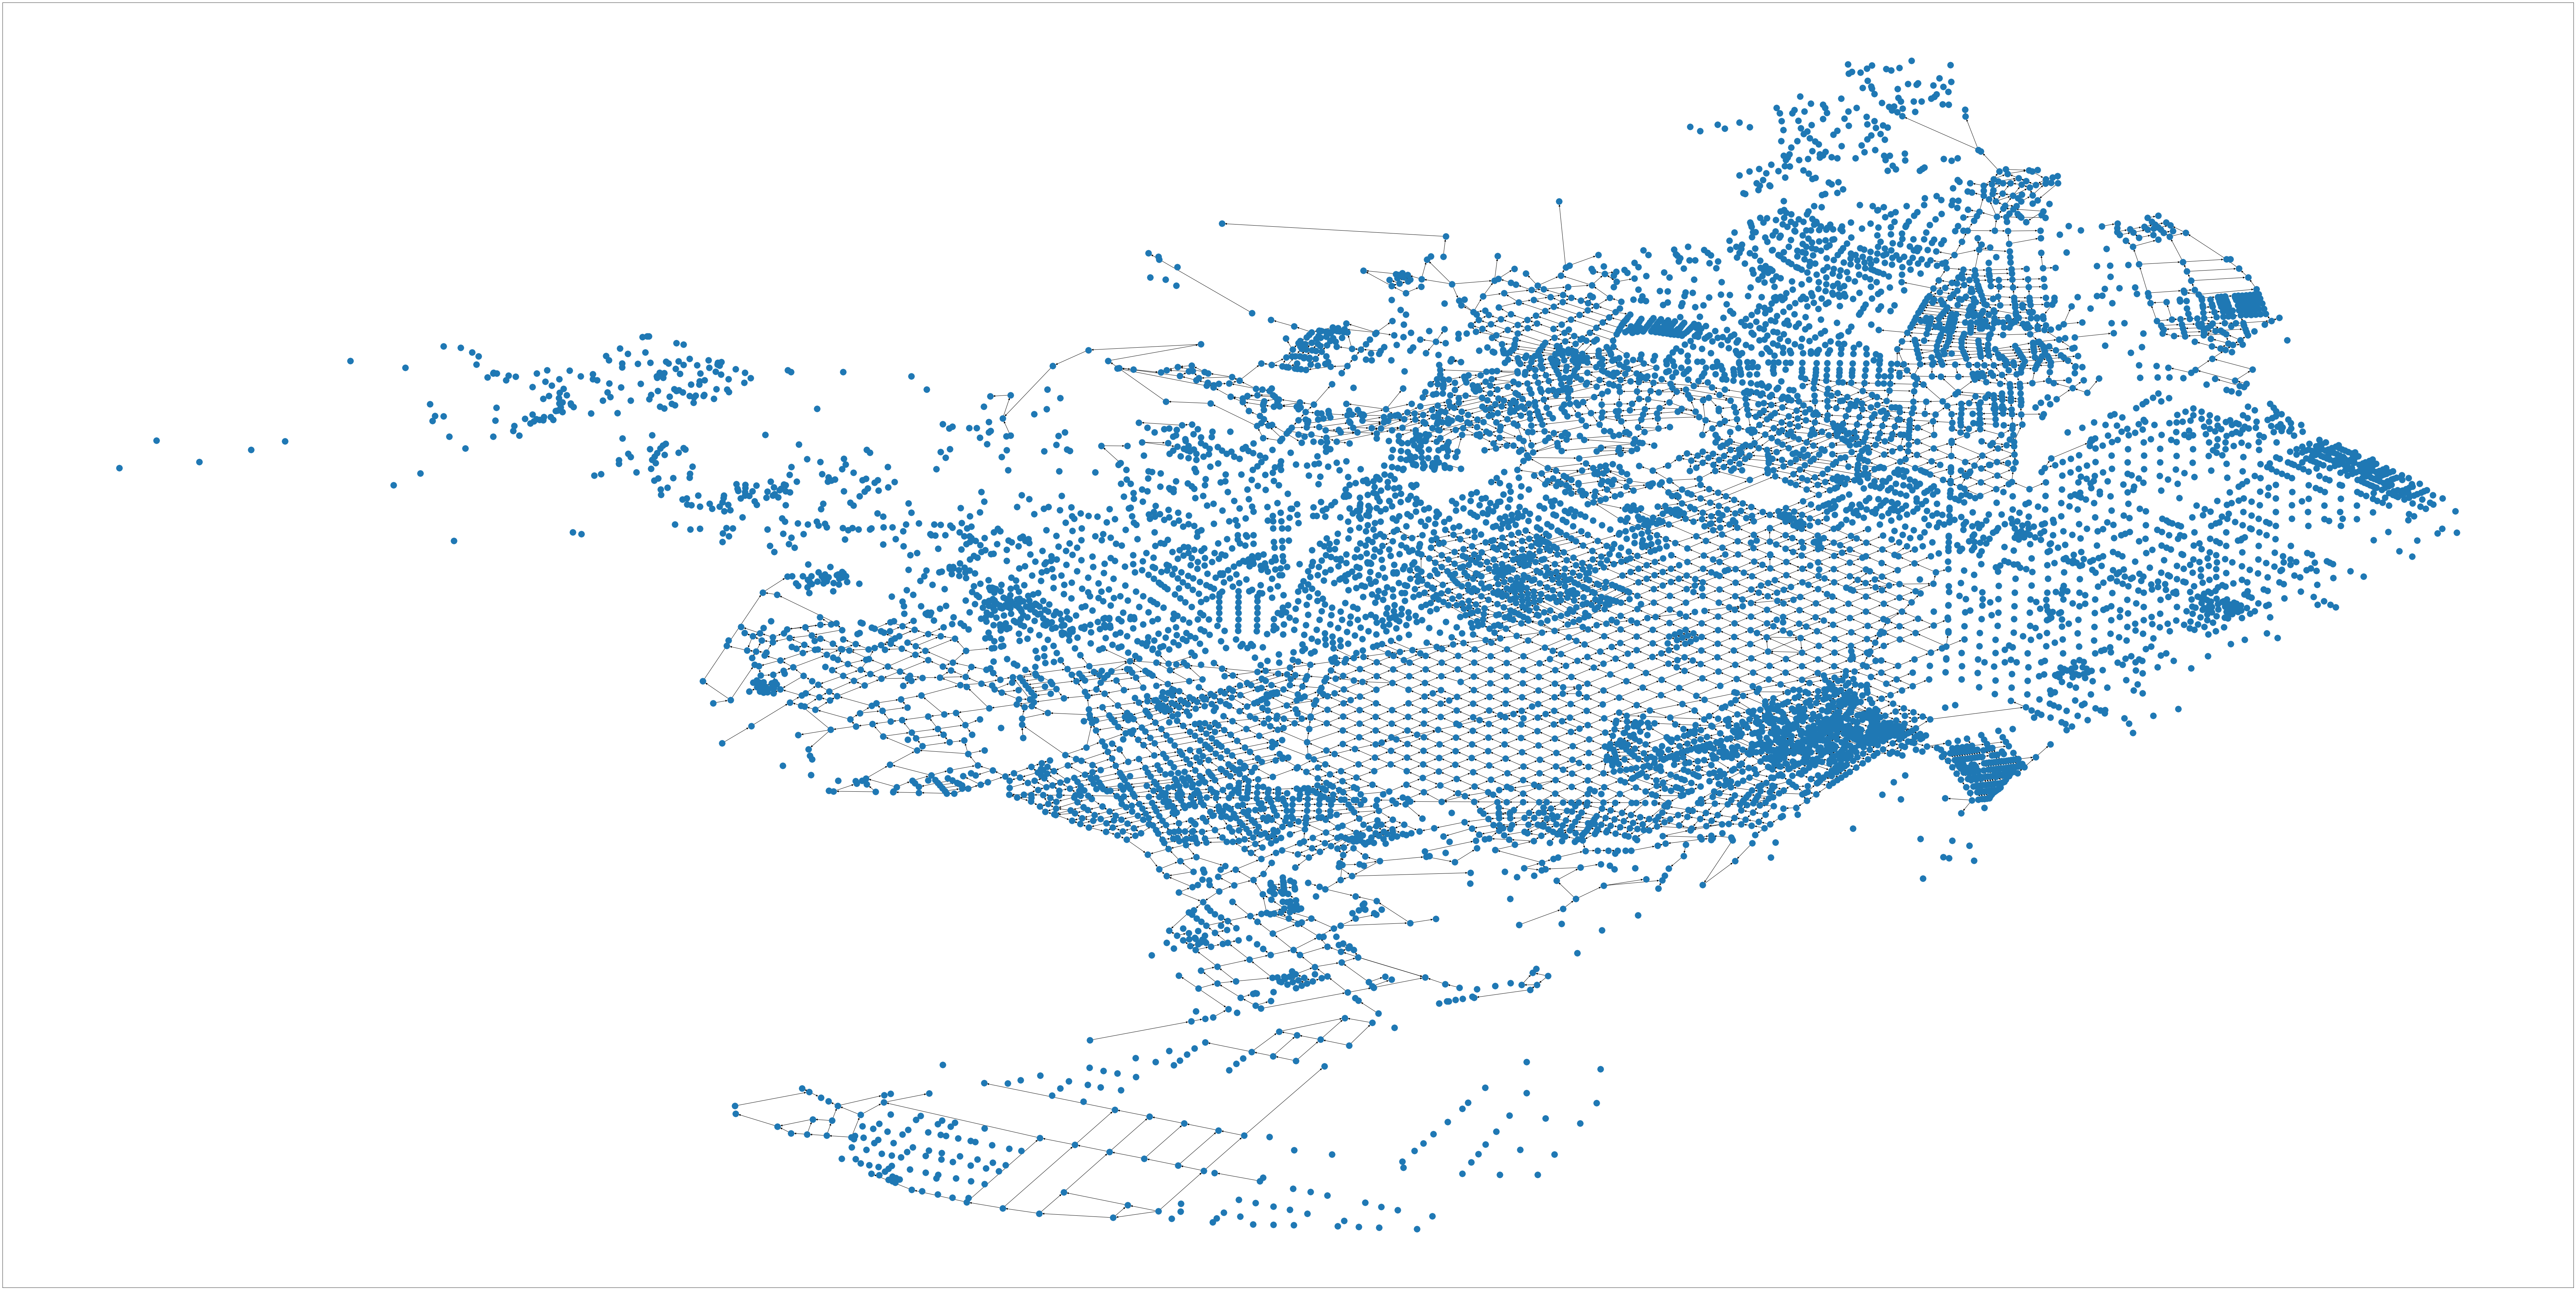

In [15]:
import torch
import dgl

u, v = torch.tensor(edges.FID_x), torch.tensor(edges.FID_y)
g = dgl.graph((u, v))

G = dgl.to_networkx(g)
plt.figure(figsize=[100,50])
nx.draw(G, pos=positions)

In [ ]:
g.edges()
len(g.edges()[0])

In [ ]:
bg = dgl.add_reverse_edges(g)
len(bg.edges()[0])

In [ ]:
BG = dgl.to_networkx(bg)
plt.figure(figsize=[100,50])
nx.draw(BG, pos=positions)

In [ ]:
import networkx as nx
path = nx.bidirectional_shortest_path(BG, 0, 4000)
path_edges = list(zip(path,path[1:]))
plt.figure(figsize=[100,50])
nx.draw(BG, pos=positions)
nx.draw_networkx_nodes(BG,positions,nodelist=path,node_color='r')
nx.draw_networkx_edges(BG,positions,edgelist=path_edges,edge_color='r',width=10)
#plt.axis('equal')
plt.show()

## Weighted graph 

In [16]:
#edges = edges[['FID_x', 'FID_y', 'TOTAL_D']]
edges.TOTAL_D = edges.TOTAL_D.map({'65 - 70 dB(A)': 65, '55 - 60 dB(A)':55, '60 - 65 dB(A)':60, '50 - 55 dB(A)': 50,
 '45 - 50 dB(A)': 45, '40 - 45 dB(A)':40, '70 - 75 dB(A)':70, '< 40 dB(A)':35, '75 - 80 dB(A)':75})
edges

<ipython-input-16-e50d0b23121f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edges.TOTAL_D = edges.TOTAL_D.map({'65 - 70 dB(A)': 65, '55 - 60 dB(A)':55, '60 - 65 dB(A)':60, '50 - 55 dB(A)': 50,


,FID_x,FID_y,TOTAL_D,Rang,LONGITUD
0,0,1,65,15,42.615
1,54,1,55,15,90.083
2,0,16,60,15,110.589
3,1,2,65,15,14.806
4,8189,2,60,15,17.552
...,...,...,...,...,...
14679,3182,8972,45,10,124.100
14680,9459,9460,55,15,88.251
14681,9462,9460,60,15,35.627
14682,9464,9209,60,10,156.474


In [17]:
edges.to_csv('data/graph_mix.csv', index=False)

In [ ]:
u, v = torch.tensor(edges.FID_x), torch.tensor(edges.FID_y)
w =  torch.tensor(edges.Rang )
g = dgl.graph((u, v))
edges.data['weight']
G = dgl.to_networkx(g)

In [ ]:
G = nx.Graph()

for i, edge in edges.iterrows():
    G.add_edge(edge['FID_x'], edge['FID_y'], weight=edge['TOTAL_D'])
    

path_w = nx.shortest_path(G,0,1000, 'weight')
path = nx.shortest_path(G,0,1000)

path_edges = list(zip(path,path[1:]))
path_edges_w = list(zip(path_w,path_w[1:]))


plt.figure(figsize=[100,50])
nx.draw(G, pos=positions)
nx.draw_networkx_nodes(G,positions,nodelist=path,node_color='r')
nx.draw_networkx_edges(G,positions,edgelist=path_edges,edge_color='r',width=10)

nx.draw_networkx_nodes(G,positions,nodelist=path_w,node_color='g')
nx.draw_networkx_edges(G,positions,edgelist=path_edges_w,edge_color='g',width=10)

plt.show()

In [ ]:
source = 100
bg.ndata['x'] = torch.zeros(g.num_nodes())
bg.ndata['x'][:] = 1000000    # very big number
bg.ndata['x'][source] = 0
for _ in range(graph_diameter):
    g.update_all(fn.u_add_e('x', 'distance', 'm'), fn.min('m', 'x'))